In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import os
import inspect
# from mpl_toolkits import mplot3d
import control

sys.path.append('/home/anton/master')

from riepybdlib import statistics as rs
from riepybdlib import manifold as rm
import riepybdlib.data as pbddata  # Some data to showcase the toolbox
import riepybdlib.plot as pbdplt   # Plot functionality (relies on matplotlib)
import riepybdlib.s2_fcts as s2_fcts

print(os.path.abspath(inspect.getfile(rm.get_s1_manifold)))

/home/anton/master/riepybdlib/manifold.py


In [2]:
m_e1 = rm.get_euclidean_manifold(1)
m_e2 = rm.get_euclidean_manifold(2)
m_e3 = rm.get_euclidean_manifold(3)

m_s1 = rm.get_s1_manifold()
m_s2 = rm.get_s2_manifold()
m_s3  = rm.get_quaternion_manifold()
m_s3 = m_e1 * m_s3
m1_pos = m_e3
m1_ori = m_s3

m2_pos = m_s1 * m_e2
m2_pos_time = m_e1 * m2_pos
# For m2, we need a representation of S1 manifold.

m3_pos = m_s2 * m_e1
m3_ori = m_s3
m3_pos_time = m_e1 * m3_pos

m_time = m_e1 * m_e3
m_t_s2 = m_e1 * m_s2
print(m2_pos_time.id_elem)

(array([0.]), array([0.]), array([0., 0.]))


In [3]:
dems = pbddata.get_letter_dataS2(letter='S',n_samples=4,use_time=True)
data = [point for dem in dems for point in dem]
data = sorted(data, key=lambda x: x[0][0])
print(data)

[(array([0.]), array([ 0.5015486 , -0.53474855,  0.68006838])), (array([0.]), array([ 0.49688715, -0.4990188 ,  0.70998831])), (array([0.]), array([ 0.55194642, -0.47779155,  0.68342548])), (array([0.]), array([ 0.50533114, -0.51006539,  0.69604148])), (array([0.00502513]), array([ 0.50155212, -0.53474613,  0.68006767])), (array([0.00502513]), array([ 0.49687565, -0.49903038,  0.70998822])), (array([0.00502513]), array([ 0.55178448, -0.47791914,  0.68346703])), (array([0.00502513]), array([ 0.50533875, -0.51006005,  0.69603986])), (array([0.01005025]), array([ 0.50148965, -0.53478884,  0.68008016])), (array([0.01005025]), array([ 0.4970792 , -0.49882539,  0.70998979])), (array([0.01005025]), array([ 0.5513854 , -0.4782352 ,  0.68356802])), (array([0.01005025]), array([ 0.50533815, -0.51006047,  0.69603999])), (array([0.01507538]), array([ 0.50149562, -0.53478477,  0.68007897])), (array([0.01507538]), array([ 0.49489119, -0.50095865,  0.7100163 ])), (array([0.01507538]), array([ 0.54826

In [21]:
def r3tom3(data):
    '''Convert euclidean list of data to the format of M3 manifold
    Input: (t, point)
    Output: (t, direction 3x1, radius 1x1)'''
    output = []
    for point in data:
        t = point[0]
        radius = np.linalg.norm(point[1])
        direction = point[1]/radius
        radius = np.array([radius])
        new_point = [t, direction, radius]
        output.append(tuple(new_point))
    return (output)
new_data = r3tom3(data)

g = rs.Gaussian(m3_pos_time).mle(new_data)

[(array([0.]), array([ 0.5015486 , -0.53474855,  0.68006838]), array([1.])), (array([0.]), array([ 0.49688715, -0.4990188 ,  0.70998831]), array([1.])), (array([0.]), array([ 0.55194642, -0.47779155,  0.68342548]), array([1.])), (array([0.]), array([ 0.50533114, -0.51006539,  0.69604148]), array([1.])), (array([0.00502513]), array([ 0.50155212, -0.53474613,  0.68006767]), array([1.])), (array([0.00502513]), array([ 0.49687565, -0.49903038,  0.70998822]), array([1.])), (array([0.00502513]), array([ 0.55178448, -0.47791914,  0.68346703]), array([1.])), (array([0.00502513]), array([ 0.50533875, -0.51006005,  0.69603986]), array([1.])), (array([0.01005025]), array([ 0.50148965, -0.53478884,  0.68008016]), array([1.])), (array([0.01005025]), array([ 0.4970792 , -0.49882539,  0.70998979]), array([1.])), (array([0.01005025]), array([ 0.5513854 , -0.4782352 ,  0.68356802]), array([1.])), (array([0.01005025]), array([ 0.50533815, -0.51006047,  0.69603999]), array([1.])), (array([0.01507538]), a

In [25]:
def M3toR3(data):
    '''Convert M3 list of data to the format of R3
    Input: (t, direction 3x1, radius 1x1)
    Output: (t, point)
    '''
    output = []
    for point in data:
        t = point[0]
        radius = point[-1][0]
        vector = point[1]*radius
        new_point = [t, vector]
        output.append(tuple(new_point))
    return (output)

new_data = r3tom3(data)
print(new_data)

g = rs.Gaussian(m_time).mle(new_data)

[(array([0.]), array([ 0.5015486 , -0.53474855,  0.68006838]), array([1.])), (array([0.]), array([ 0.49688715, -0.4990188 ,  0.70998831]), array([1.])), (array([0.]), array([ 0.55194642, -0.47779155,  0.68342548]), array([1.])), (array([0.]), array([ 0.50533114, -0.51006539,  0.69604148]), array([1.])), (array([0.00502513]), array([ 0.50155212, -0.53474613,  0.68006767]), array([1.])), (array([0.00502513]), array([ 0.49687565, -0.49903038,  0.70998822]), array([1.])), (array([0.00502513]), array([ 0.55178448, -0.47791914,  0.68346703]), array([1.])), (array([0.00502513]), array([ 0.50533875, -0.51006005,  0.69603986]), array([1.])), (array([0.01005025]), array([ 0.50148965, -0.53478884,  0.68008016]), array([1.])), (array([0.01005025]), array([ 0.4970792 , -0.49882539,  0.70998979]), array([1.])), (array([0.01005025]), array([ 0.5513854 , -0.4782352 ,  0.68356802]), array([1.])), (array([0.01005025]), array([ 0.50533815, -0.51006047,  0.69603999]), array([1.])), (array([0.01507538]), a

In [6]:
def R3toM2(data, axis='x'):
    '''Converts to cylindrical coordinates, axis specifies which axis cylinder is around
    '''
    output = []
    if axis == 'x':
        for point in data:
            t = point[0]
            x = point[-1][0]
            y = point[-1][1]
            z = point[-1][2]
            theta = np.arctan2(z, y)
            radius = np.sqrt((pow(y,2)+pow(z,2)))
            vector = np.array([x,radius])
            new_point = [t, theta, vector]
            output.append(tuple(new_point))
        return (output)
    elif axis == 'y':
        for point in data:
            t = point[0]
            x = point[-1][0]
            y = point[-1][1]
            z = point[-1][2]
            theta = np.arctan2(z, x)
            radius = np.sqrt((pow(x,2)+pow(z,2)))
            vector = np.array([y,radius])
            new_point = [t, theta, vector]
            output.append(tuple(new_point))
        return (output)
    elif axis == 'z':
        for point in data:
            t = point[0]
            x = point[-1][0]
            y = point[-1][1]
            z = point[-1][2]
            theta = np.arctan2(x, y)
            radius = np.sqrt((pow(x,2)+pow(y,2)))
            vector = np.array([z,radius])
            new_point = [t, np.array([theta]), vector]
            output.append(tuple(new_point))
        return (output)
    else:
        "Print please provide axis x y or z"

print(m2_pos_time.id_elem)
print(data)
print(R3toM2(data,axis='z'))

(array([0.]), array([0.]), array([0., 0.]))
[(array([0.]), array([ 0.5015486 , -0.53474855,  0.68006838])), (array([0.]), array([ 0.49688715, -0.4990188 ,  0.70998831])), (array([0.]), array([ 0.55194642, -0.47779155,  0.68342548])), (array([0.]), array([ 0.50533114, -0.51006539,  0.69604148])), (array([0.00502513]), array([ 0.50155212, -0.53474613,  0.68006767])), (array([0.00502513]), array([ 0.49687565, -0.49903038,  0.70998822])), (array([0.00502513]), array([ 0.55178448, -0.47791914,  0.68346703])), (array([0.00502513]), array([ 0.50533875, -0.51006005,  0.69603986])), (array([0.01005025]), array([ 0.50148965, -0.53478884,  0.68008016])), (array([0.01005025]), array([ 0.4970792 , -0.49882539,  0.70998979])), (array([0.01005025]), array([ 0.5513854 , -0.4782352 ,  0.68356802])), (array([0.01005025]), array([ 0.50533815, -0.51006047,  0.69603999])), (array([0.01507538]), array([ 0.50149562, -0.53478477,  0.68007897])), (array([0.01507538]), array([ 0.49489119, -0.50095865,  0.710016

In [10]:
def s1xr2_to_r3(data, axis='x'):
    """Converts from S1 x R2 to R3, handling different S1 axis orientations.

    Args:
        theta: The angle on the S1 circle.
        x, y, z: The coordinates in the R2 plane.
        axis: The axis around which the S1 circle is oriented. 
              Can be 'x', 'y', or 'z' (default is 'z').
    Returns:
        The corresponding (x, y, z) coordinates in R3 space.
    """
    output = []
    if axis == 'x':
        for point in data:
            t = point[0]
            theta = point[1][0]
            x = point[-1][0]
            radius = point[-1][1]
            # radius = np.sqrt(y**2 + z**2)  
            new_y = radius * np.cos(theta)
            new_z = radius * np.sin(theta)
            new_point = [t, np.array([x, new_y, new_z])]
            output.append(tuple(new_point))
        return output

    elif axis == 'y':
        for point in data:
            t = point[0]
            theta = point[1][0]
            y = point[-1][0]
            radius = point[-1][1]
            # radius = np.sqrt(y**2 + z**2)  
            new_x = radius * np.cos(theta)
            new_z = radius * np.sin(theta)
            new_point = [t, np.array([new_x, y, new_z])]
            output.append(tuple(new_point))
        return output

    elif axis == 'z':
        for point in data:
            t = point[0]
            theta = point[1][0]
            z = point[-1][0]
            radius = point[-1][1]
            # radius = np.sqrt(x**2 + y**2)
            new_x = radius * np.sin(theta)
            new_y = radius * np.cos(theta)
            new_point = [t, np.array([new_x, new_y, z])]
            output.append(tuple(new_point))
        return output

    else:
        raise ValueError("Invalid axis. Must be 'x', 'y', or 'z'")
    
print(data)
print(R3toM2(data, axis='z'))
print(s1xr2_to_r3(R3toM2(data,axis='z'),axis='z'))

[(array([0.]), array([ 0.5015486 , -0.53474855,  0.68006838])), (array([0.]), array([ 0.49688715, -0.4990188 ,  0.70998831])), (array([0.]), array([ 0.55194642, -0.47779155,  0.68342548])), (array([0.]), array([ 0.50533114, -0.51006539,  0.69604148])), (array([0.00502513]), array([ 0.50155212, -0.53474613,  0.68006767])), (array([0.00502513]), array([ 0.49687565, -0.49903038,  0.70998822])), (array([0.00502513]), array([ 0.55178448, -0.47791914,  0.68346703])), (array([0.00502513]), array([ 0.50533875, -0.51006005,  0.69603986])), (array([0.01005025]), array([ 0.50148965, -0.53478884,  0.68008016])), (array([0.01005025]), array([ 0.4970792 , -0.49882539,  0.70998979])), (array([0.01005025]), array([ 0.5513854 , -0.4782352 ,  0.68356802])), (array([0.01005025]), array([ 0.50533815, -0.51006047,  0.69603999])), (array([0.01507538]), array([ 0.50149562, -0.53478477,  0.68007897])), (array([0.01507538]), array([ 0.49489119, -0.50095865,  0.7100163 ])), (array([0.01507538]), array([ 0.54826

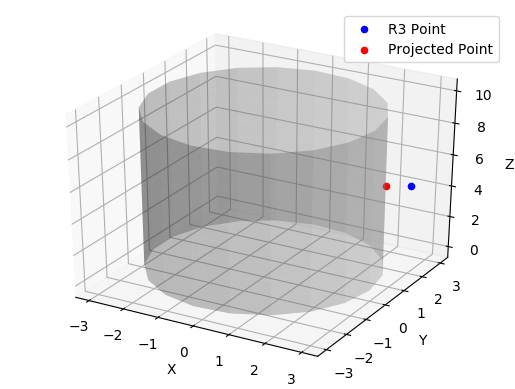

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Original Point in R3
x, y, z = 3, 2, 5
ax.scatter(x, y, z, color='blue', label='R3 Point')
theta = np.arctan2(y, x)
vector = np.array([x,y])
new_point = [t, theta, vector]
output.append(tuple(new_point))


# Cylinder (Adjust radius and height if needed)
radius = 3
height = 10
u, v = np.mgrid[0:2*np.pi:20j, 0:height:10j]
cyl_x = radius * np.cos(u)
cyl_y = radius * np.sin(u)
cyl_z = v
ax.plot_surface(cyl_x, cyl_y, cyl_z, alpha=0.3, color='gray')

# Calculate angle theta
# theta = np.arctan2(y, x)

# Projection onto cylinder
proj_x = radius * np.cos(theta)
proj_y = radius * np.sin(theta)
proj_z = z
ax.scatter(proj_x, proj_y, proj_z, color='red', label='Projected Point')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()


[array([0.        , 5.97449909, 8.1010453 ]), array([0.05025126, 5.97454726, 8.10104523]), array([0.10050251, 5.97369412, 8.10104638]), array([0.15075377, 5.97377566, 8.10104621]), array([0.20100503, 5.94119321, 8.10102256]), array([0.25125628, 5.9197359 , 8.10106781]), array([0.30150754, 5.89230407, 8.10113297]), array([0.35175879, 5.86177456, 8.10069506]), array([0.40201005, 5.82700791, 8.1016258 ]), array([0.45226131, 5.78355753, 8.10538881]), array([0.50251256, 5.72882952, 8.10920863]), array([0.55276382, 5.66013195, 8.11397473]), array([0.60301508, 5.58021595, 8.12177062]), array([0.65326633, 5.48762692, 8.13197578]), array([0.70351759, 5.38482422, 8.1463567 ]), array([0.75376884, 5.26181498, 8.1662151 ]), array([0.8040201 , 5.08937745, 8.18967554]), array([0.85427136, 4.88527633, 8.21139557]), array([0.90452261, 4.66922251, 8.23176261]), array([0.95477387, 4.43664426, 8.25803548]), array([1.00502513, 4.20016503, 8.28421561]), array([1.05527638, 3.95140071, 8.30855285]), array([1.

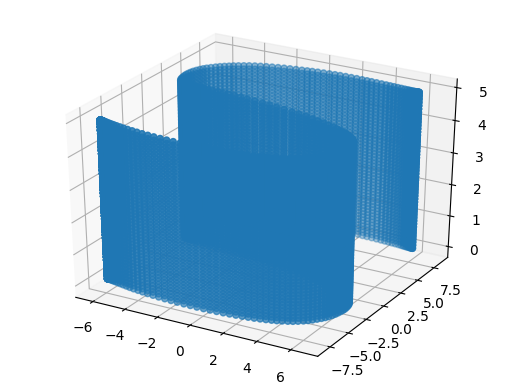

In [51]:
dems = pbddata.get_letter_data(letter='S',n_samples=5,use_time=True)
data = [point for dem in dems for point in dem]
print(data)
result = data
num_demos = 50  # Number of demonstrations

# Create incrementing z values
z_values = np.arange(0, num_demos * 0.1, 0.1)  # [0, 0.1, 0.2, ..., 4.9]

result = []
for z in z_values:
    for row in data:
        new_row = np.append(row, z)  # Add z as a new element
        result.append(new_row)  # No need for extra dimension

print(result[:5])  # Print the first 5 elements for demonstration
print(data[-5:])
data = [(np.array([row[0]]), row[1:4]) for row in result]

train_data = np.array(list(map(lambda x: x[1], data)))
train_data
test_traj = train_data
ax = plt.axes(projection ='3d')
ax.scatter(test_traj[:,0],test_traj[:,1],test_traj[:,2], 'orange')
plt.show()

(1000, 3)
(1000,)


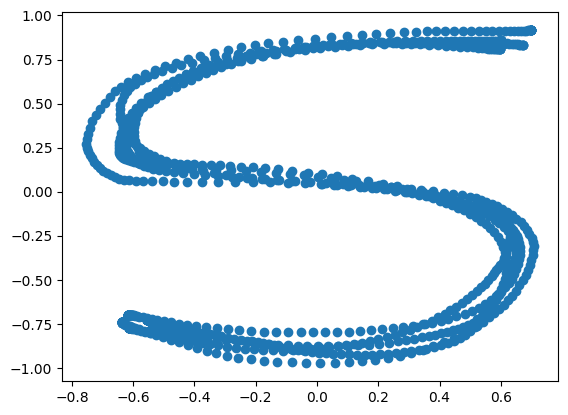

In [11]:
dems = pbddata.get_letter_data(letter='S',n_samples=5,use_time=True)
data = [point for dem in dems for point in dem]
print(np.array(data).shape)
plotting = np.array(data)
x = plotting[:,1]*0.1
y = plotting[:,2]*0.1
print(y.shape)
plt.scatter(x,y)